            Inflation
Month                
2005-01-01        7.3
2005-02-01        7.3
2005-03-01        7.1
2005-04-01        7.2
2005-05-01        7.3
            Inflation
Month                
2024-08-01        3.3
2024-09-01        1.9
2024-10-01        2.3
2024-11-01        2.5
2024-12-01        2.9
Total: 240, Train: 228, Test: 12
The Month is Stationary (p-value: 0.0393)


,Inflation
Month,
2015-09-01,-0.4
2015-10-01,-0.2


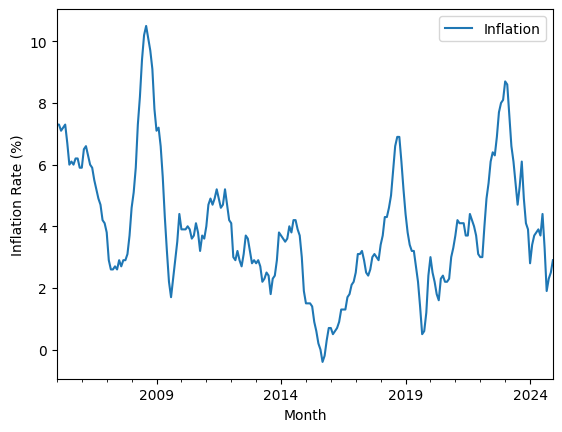

In [30]:
import pandas as pd
import warnings
from utils import split, adf_test
warnings.filterwarnings("ignore")

df = pd.read_csv("inflation.csv", index_col="Month", parse_dates=True)
df.index.freq = "MS"
# Use 2005-2024
df = df.iloc[12*(2005-1958):]
print(df.head())
print(df.tail())
df.plot(xlabel="Month", ylabel="Inflation Rate (%)")

train, test = split(df["Inflation"])
adf_test(train)


df[df < 0].dropna()


<Axes: xlabel='Month'>

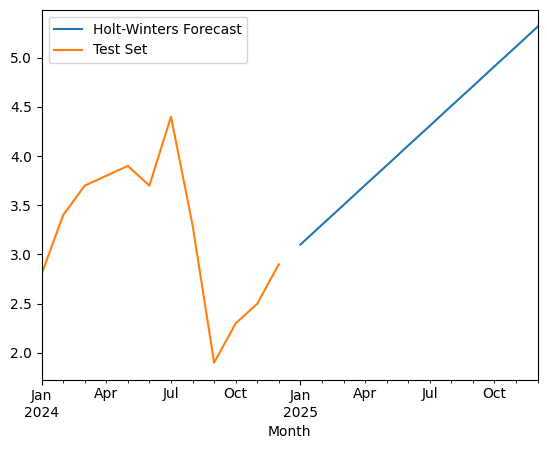

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(df, trend='add', seasonal='add').fit()

fitted_model.forecast(len(test)).plot(legend=True, label="Holt-Winters Forecast")
df["Inflation"].iloc[-12:].plot(legend=True, label="Test Set")